## Supreme Court overruling decisions
An historic Supreme Court overrule is shaking the news right now. Let's see how long this precedent is compared to the previous 30 overruling decisions. 

Source: 
- [Congressional records of supreme court overrule decisions](https://constitution.congress.gov/resources/decisions-overruled)

In [1]:
# standard imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style()

In [169]:
# import and sample data
cases = pd.read_csv("cases.csv")
cases.sample(5)

,Order,Overruling Decision,Year of Overruling Decision,Overruled Decision(s),Year(s) of Overruled Decision(s)
82,83,"Continental T.V., Inc. v. GTE Sylvania,433 U.S...",1977,"United States v. Arnold, Schwinn & Co.,388 U.S...",1967
11,12,"Obergefell v. Hodges,No. 14-556 (U.S. June 26,...",2015,"Baker v. Nelson,409 U.S. 810 (1972)",1972
115,116,"Moore v. Ogilvie,394 U.S. 814 (1969)",1969,"MacDougall v. Green,335 U.S. 281 (1948)",1948
67,68,Pennhurst State School & Hospital v. Halderman...,1984,"Rolston v. Missouri Fund Commissioners,120 U.S...",1887
50,51,W. S. Kirkpatrick & Co. v. Environmental Tecto...,1990,"American Banana Co. v. United Fruit Co.,213 U....",1909


In [170]:
# rename columns
cases.columns = ["order", "overrule", "year_overrule", "original", "year_original"]

Here we remove case number and date/time of decision to improve the aesthetic of the final plot without losing critical information.

In [171]:
cases["overrule"] = cases["overrule"].apply(lambda x: x.split(",")[0])
cases.head()

,order,overrule,year_overrule,original,year_original
0,1,Dobbs v. Jackson Women’s Health Organization,2022,Planned Parenthood of Southeastern Pennsylvani...,19921973
1,2,Ramos v. Louisiana,2020,"Apodaca v. Oregon,406 U.S. 404 (1972) (plurali...",1972
2,3,Franchise Tax Board of California v. Hyatt,2019,"Nevada v. Hall, 440 U.S. 410 (1979)",1979
3,4,Herrera v. Wyoming,2019,"Ward v. Race Horse,163 U.S. 504 (1896)",1896
4,5,Knick v. Township of Scott,2019,Williamson County Regional Planning Commission...,1985


Our years of original decisions are concatenated strings of multiple years. Here we split those years and take the earliest, converting them to integers for ease of plotting.

In [172]:
def split_years(s:str) -> int:
    years = [s[i:i+4] for i in range(0,len(s),4)]
    final_year = years[-1]
    return int(final_year)

In [173]:
cases["year_original"] = cases["year_original"].apply(split_years)

### Plotting the data

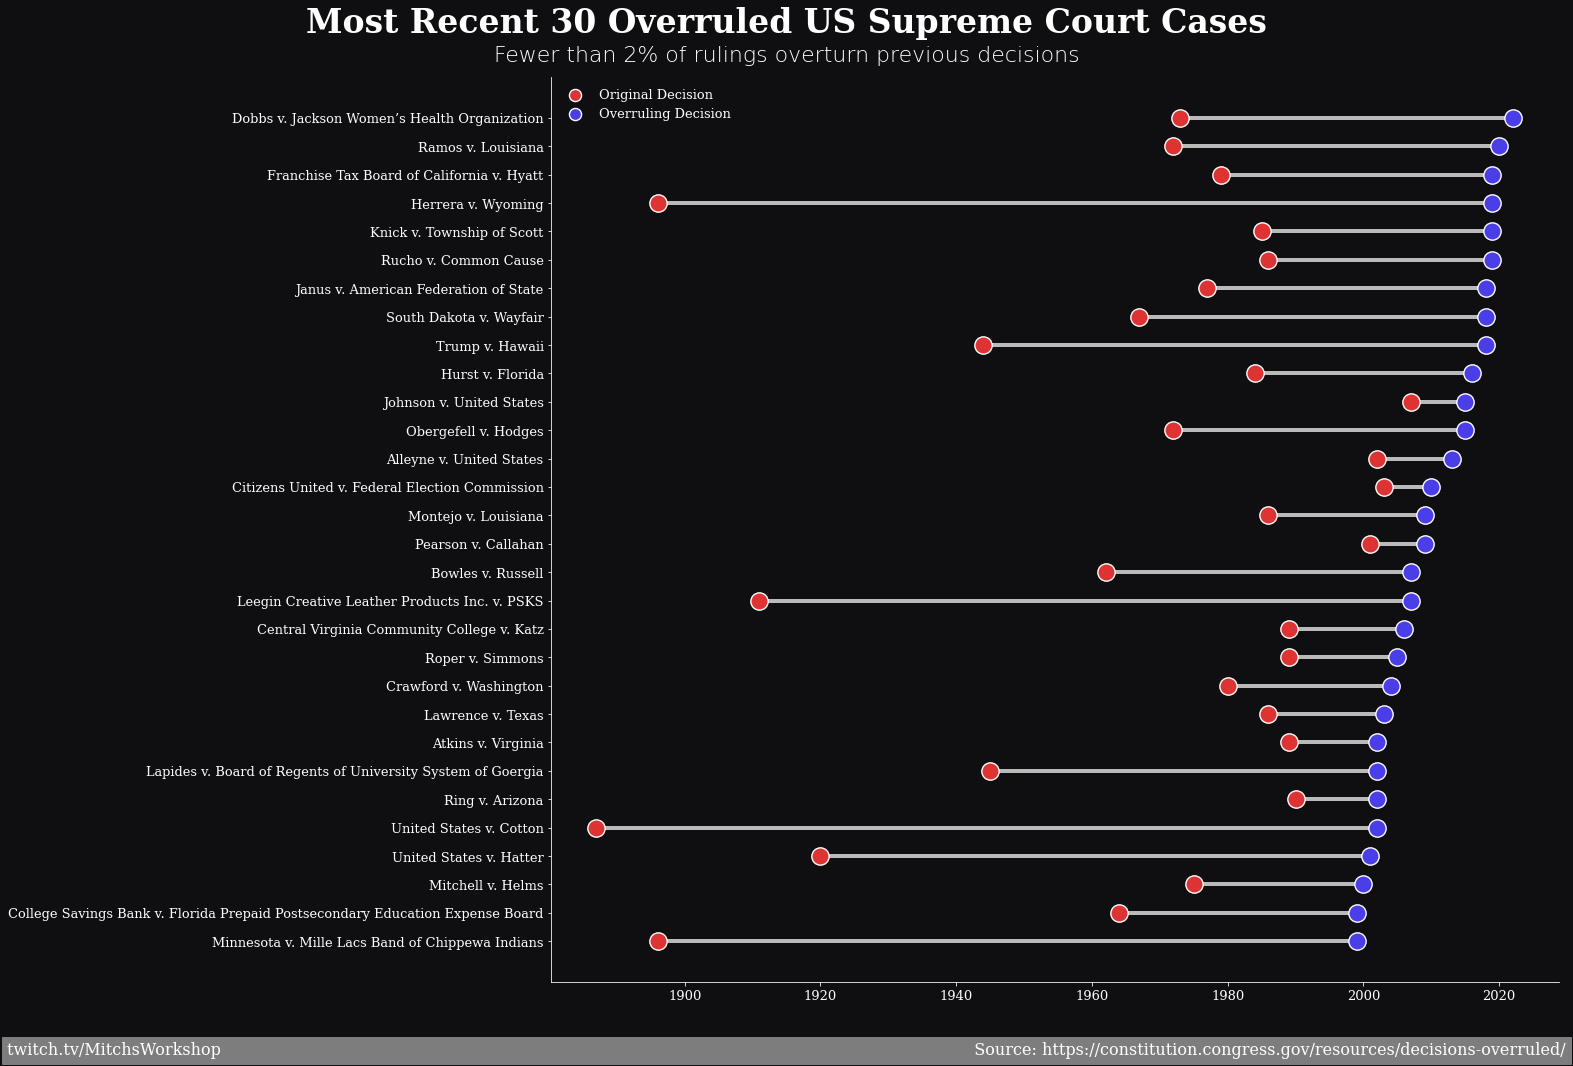

In [168]:
NUM_CASES = 30 # cases.shape[0] # for all data (will misalign text elements in the plot)
data = cases.iloc[0:NUM_CASES]
FIRST_YEAR = data["year_original"].min()
FONT = {'family' : 'DejaVu Serif',
        'weight' : 'book',
        'size'   : 13}

BG = "0f0e11"
ORIG = "#dd3333"
OVER = "#493ee8"

# set background color and plot shape
fig = plt.figure(figsize=(22,NUM_CASES/2))
plt.rcParams["axes.facecolor"] = BG
plt.rcParams["figure.facecolor"] = BG
plt.rcParams["figure.autolayout"] = True
plt.rc("font", **FONT)

# bars between original and overrule years
for _, row in data.iterrows():
    x_min = row["year_original"]
    x_max = row["year_overrule"]
    plt.hlines(row["overrule"], x_min, x_max, linewidth=4, color="#bababa")
    
# plot original decision dates with red markers
ax_original = sns.scatterplot(
    y = "overrule",
    x = "year_original",
    color = ORIG,
    data = data,
    s = 300,
    zorder = 2,
    label = "Original Decision"
)

# plot overru
ax_overturned = sns.scatterplot(
    y = "overrule",
    x = "year_overrule",
    color = OVER,
    data = data,
    s = 300,
    zorder = 2,
    label = "Overruling Decision"
)

# title
plt.text(
    x = 1915,
    y = -3,
    s = f"Most Recent {NUM_CASES} Overruled US Supreme Court Cases", 
    color = "white", 
    fontsize = 33,
    fontweight = "bold",
    ha = "center"
)

# subtitle
plt.text(
    s = "Fewer than 2% of rulings overturn previous decisions",
    x = 1915,
    y = -2,
    fontsize = 22,
    color = "white",
    fontweight = "light",
    fontfamily = "sans serif",
    ha = "center"
)

ax_original.grid(False)
ax_original.tick_params(axis = "x", colors = "white")
ax_original.tick_params(axis = "y", colors = "white")
ax_original.spines["top"].set_color((0,0,0,0))
ax_original.spines["right"].set_color((0,0,0,0))
ax_original.spines["left"].set_color((1,1,1,1))
ax_original.spines["bottom"].set_color((1,1,1,1))

legend = plt.legend(
    labelcolor = "white", 
    markerscale = 0.7, 
    frameon = False,
    loc = "upper left"
)

signature = "twitch.tv/MitchsWorkshop" + " "*147 + "Source: https://constitution.congress.gov/resources/decisions-overruled/"

plt.text(
    ha = "center",
    x = 1915,
    y = 33,
    s = signature,
    backgroundcolor = "#7d7d7d",
    color = "white",
    fontsize = 16
)

plt.xlabel("")
plt.ylabel("")

plt.savefig("final.png", bbox_inches = "tight")
plt.show()